# Imports

`numpy`      import to manupulate arrays  
`pandas`     import to create and modify dataframes  
`matplotlib` to visulaize graphs  
`seaborn`    build on matploblib, higher level graph functions

In [1]:
# Imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data
Here we are taking the inbuilt function of keras to load the data from the server  
The dataset file in present in the [Link to dataset in amazon server](https://s3.amazonaws.com/img-datasets/mnist.npz)  
The inbuilt code 
```python
def load_data(path='mnist.npz'):
    """Loads the MNIST dataset.
    # Arguments
        path: path where to cache the dataset locally
            (relative to ~/.keras/datasets).
    # Returns
        Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.
    """
    path = get_file(path,
                    origin='https://s3.amazonaws.com/img-datasets/mnist.npz',
                    file_hash='8a61469f7ea1b51cbae51d4f78837e45')
    f = np.load(path)
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']
    f.close()
    return (x_train, y_train), (x_test, y_test)
```
which downloads the data and unpacks and gives back as tuples of test, train splits   

## Regarding Dataset
Mnist is data set of handwritten digits of 0-9, [official Link](http://yann.lecun.com/exdb/mnist/)   
60000 training samples  
10000 testing samples   

In [2]:
# Loading the data
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

Using TensorFlow backend.


# Understand the dataset
Let see the size and shape of test and training tuples

``On Execution``  
There will be 60000 samples of 28*28 resolution of images in training set  
There will be 10000 samples of 28*28 resolution of images in testing set

In [3]:
print("The size of training samples is ",len(x_train))
print("The size of testing samples is ",len(x_test))
print("The shape of training samples array is",np.shape(x_train))
print("The shape of training labels is ",np.shape(y_train))

The size of training samples is  60000
The size of testing samples is  10000
The shape of training samples array is (60000, 28, 28)
The shape of training labels is  (60000,)


# Visualizing the data
Let us try to visualise the few samples of data so, we could get an idea of how the data looks like  
`On Execution`  
We can see ten images of 

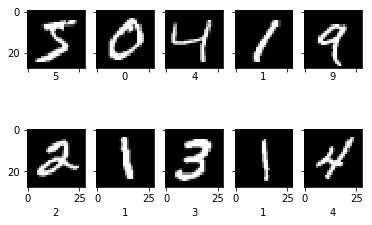

In [4]:
# Visualizing the data
fig, ax = plt.subplots(2, 5, sharex=True, sharey=True)
index = 0
for row in ax:
    for col in row:
        col.set_xlabel(str(y_train[index]))
        col.imshow(x_train[index],cmap='gray')
        index+=1
plt.show()

# Preprocessing the data

## Vairables
`image_width`,`image_height`,`image_channels` would describe the dimentions of the image  
`classes` to detemine how many catogories of samples present in out dataset. By nature mnist have 0-9 images to ten classes  

## Creating sparse vector representation
`to_categorical` is converting into one hot encoding. Means each vector is represented by one hot encoding.
0 --> [1,0,0,0,0,0,0,0,0,0]   
1 --> [0,1,0,0,0,0,0,0,0,0]  
2 --> [0,0,1,0,0,0,0,0,0,0]   
and similarly goes on 

`np.expand_dims` would just increst one dimentions in the end. Like .... [1,2,3] to [[1],[2],[3]]  


`Line16`,`Line17`is normalization we are divinding all the pixal values by 255. so all the numerical values are converted between 0 and 1
>Note: since its a simple dataset there is not much of processing required to attain good accuracies. For all real time datasest preprocessing like normalizing , standadising , on hot encoding, filling the missing values, transforming features, feeding the data in batches and all other type of preprocessing is required


In [5]:
# Vairables
image_width = 28
image_height = 28
image_channels = 1
input_shape = (image_width,image_height,image_channels)
classes =  10

# Creating sparse vector representation
from keras.utils import to_categorical
y_train_sparse = to_categorical(y_train,num_classes=classes)
y_test_sparse = to_categorical(y_test,num_classes=classes)

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

x_train = x_train/255 # Normalizing the x_trian
x_test = x_test/255 # Normalizing the X_test

# Training varibles
These Training varbles are hyper parameters for neural network training.   
`epochs` : each epoch is forward propagation + backward propagation over the whole dataset once is called one epoch.  
`learning_rate` : the magnitude in which the weights are modified one the acquired loss.   
`learning_rate_decay` : there can be high leanring rate at the beining of the training when the loss is high. Over a period of time the learning rate can reduce for fine training of network.  
`batch_size` : the data is fed to the network in batches of 32 samples at each time. This batch feeding is done all over the whole dataset.  

In [6]:
# Training varibles
epochs = 10
learning_rate = 0.001
learning_rate_decay = 0.000001
batch_size = 32

# Neural Netowork Model
`Line 6` : we are building a keras sequential model  
`Line 32` : we are using stochastic gradient decent optimizer  
`Line 36` : compiling the model to check if the model is build properly.  

The loss function being used is `categorical_crossentropy` since its a multi class classification


In [7]:
# Building the model
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Activation,Dense
from keras.optimizers import SGD

model = Sequential()

# Layer 1
model.add(Conv2D(64,kernel_size=(3,3), strides=(1, 1), padding='valid', data_format="channels_last", input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Dropout(rate=0.25))
# Layer 2
model.add(Conv2D(32,kernel_size =(3,3), strides=(1, 1), padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Dropout(rate=0.25))

# Layer 3
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(rate=0.25))

# Layer 4
model.add(Dense(256))
model.add(Activation('relu'))

# Layer 5
model.add(Dense(10,activation='softmax'))

# optimizer
optimizer = SGD(lr = learning_rate, momentum=0.0, decay=learning_rate_decay, nesterov=True)

# Model Compilation
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


# Training 
Training is the process of feeding the data to neural network and modifiying the weights of the model using the the backpropagation algorithm. The backpropagation using loss the function acquires the loss over batch size of data and does a backpropagation to modify the weights in such a way the in the next epoch the loss would be less when compared to the current epoch

In [8]:
# Training the model
model_history = model.fit(x=x_train, y=y_train_sparse, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test,y_test_sparse), shuffle=True, initial_epoch=1)

Train on 60000 samples, validate on 10000 samples
Epoch 2/10
60000/60000 [==============================] - 12s 201us/step - loss: 2.2338 - acc: 0.2341 - val_loss: 2.0301 - val_acc: 0.5670
Epoch 3/10
60000/60000 [==============================] - 9s 152us/step - loss: 1.4317 - acc: 0.5663 - val_loss: 0.6453 - val_acc: 0.8362
Epoch 4/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.7848 - acc: 0.7425 - val_loss: 0.4460 - val_acc: 0.8756
Epoch 5/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.6144 - acc: 0.8034 - val_loss: 0.3580 - val_acc: 0.8958
Epoch 6/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.5170 - acc: 0.8349 - val_loss: 0.3062 - val_acc: 0.9098
Epoch 7/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.4490 - acc: 0.8583 - val_loss: 0.2598 - val_acc: 0.9243
Epoch 8/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.3965 - acc: 0.8760 - val_loss: 0.2310 -

# Results
using the trained model we try to predict what are the values of images in the test set

In [9]:
# Results
y_pred = model.predict(x_test,  verbose=1)

10000/10000 [==============================] - 1s 51us/step


# Verifying the results
cheking the results how good they are with the first 10 samples.   
Plotting the graphs of test and train set accuracies and loss values. 
> NOTE: This plot is a very curicial step. These plots would tell us how good the model converges and if there is any overfitting

Ground truths of first 10 images in test set [7 2 1 0 4 1 4 9 5 9]
Predicted values of first 10 image in test set [7 2 1 0 4 1 4 9 5 9]


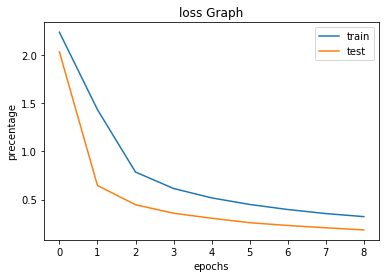

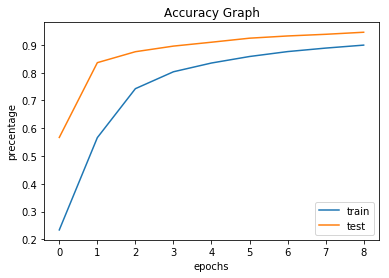

In [10]:
# Verifying the results
print("Ground truths of first 10 images in test set",np.array(y_test[0:10]))
print("Predicted values of first 10 image in test set",np.argmax(y_pred[0:10],axis=1))


loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
plt.plot(loss,label='train')
plt.plot(val_loss,label='test')
plt.title('loss Graph')
plt.ylabel('precentage')
plt.xlabel('epochs')
plt.legend()
plt.show()

acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
plt.plot(acc,label='train')
plt.plot(val_acc,label='test')
plt.title('Accuracy Graph')
plt.ylabel('precentage')
plt.xlabel('epochs')
plt.legend()
plt.show()

# Visulizing the results
checking the results by visulizing them and creating a confusion matrix. The values of precession and accuracy can be obtained by the help of confusion matrix and f1 scores to compare this architecure with other architectures of neural networks

Predicted    0     1    2    3    4    5    6    7    8    9
Actual                                                      
0          969     0    1    0    0    1    2    1    6    0
1            0  1111    3    2    0    0    4    0   14    1
2           11     0  967   11    5    1    5   16   15    1
3            1     1   18  946    0   14    0    9   15    6
4            1     1    3    0  919    0   13    1    5   39
5           12     2    2   22    1  825    8    1   14    5
6           14     3    2    2    6   12  916    0    3    0
7            2     4   27    3    2    1    0  947    5   37
8            9     1    3   11    6    7    5    8  908   16
9            7     6    3   12    6    3    1    8   14  949


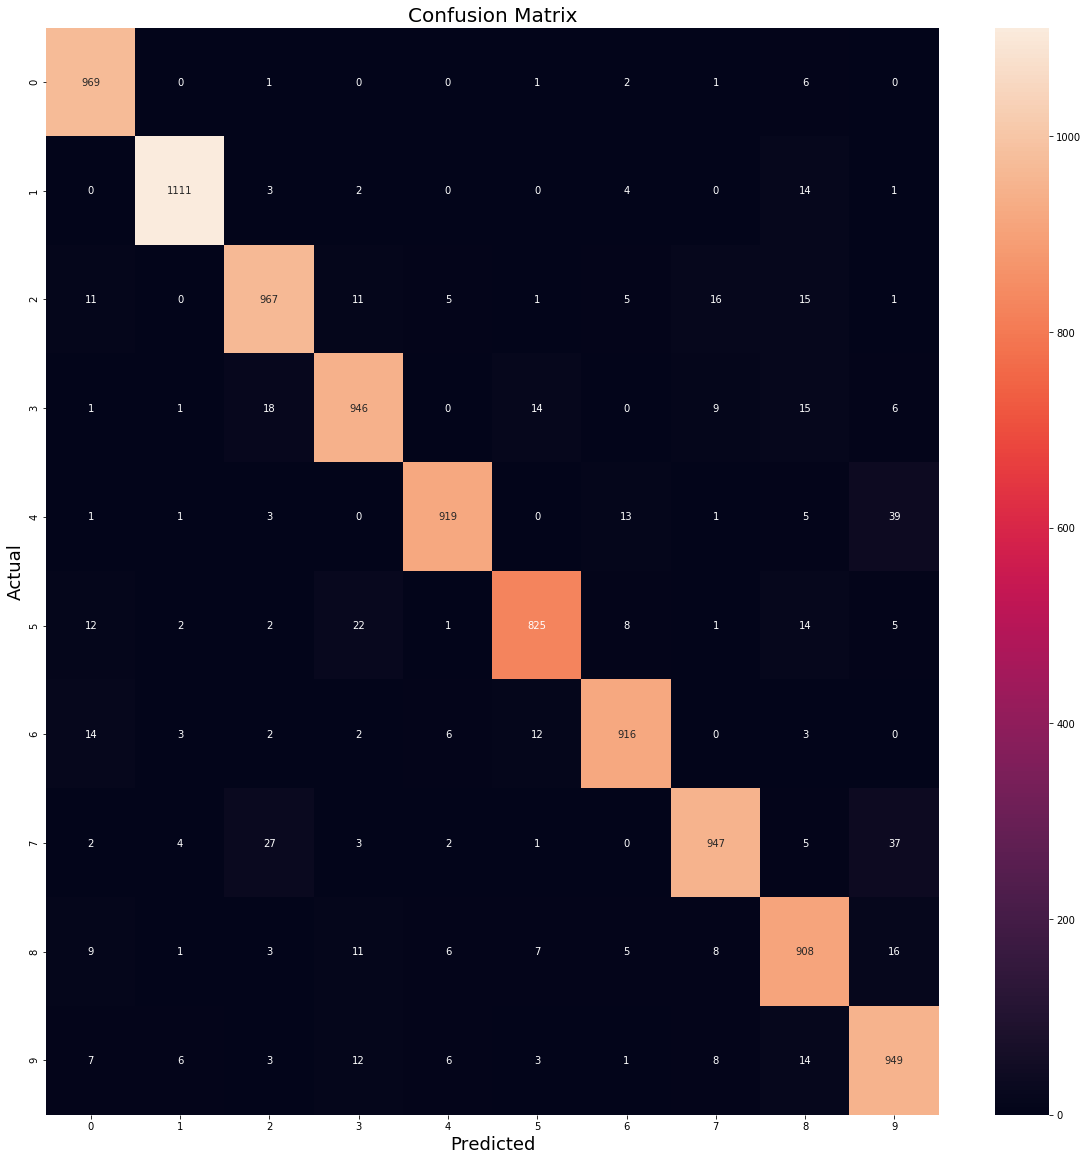

In [11]:
# Visulizing the results
y_pred = np.argmax(y_pred,axis=1)
y_pred = pd.Series(y_pred, name='Predicted')
y_test = pd.Series(y_test, name='Actual')
df_confusion  = pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames=['Predicted'])
print(df_confusion)
plt.figure(figsize = (20,20))
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.title('Confusion Matrix',fontsize=20)
sns.heatmap(df_confusion, annot=True,fmt="d")